# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [2]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [3]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

# Display the first few rows of the DataFrame
print(df.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

The following code checks that you loaded the data correctly:

In [6]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [7]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [8]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

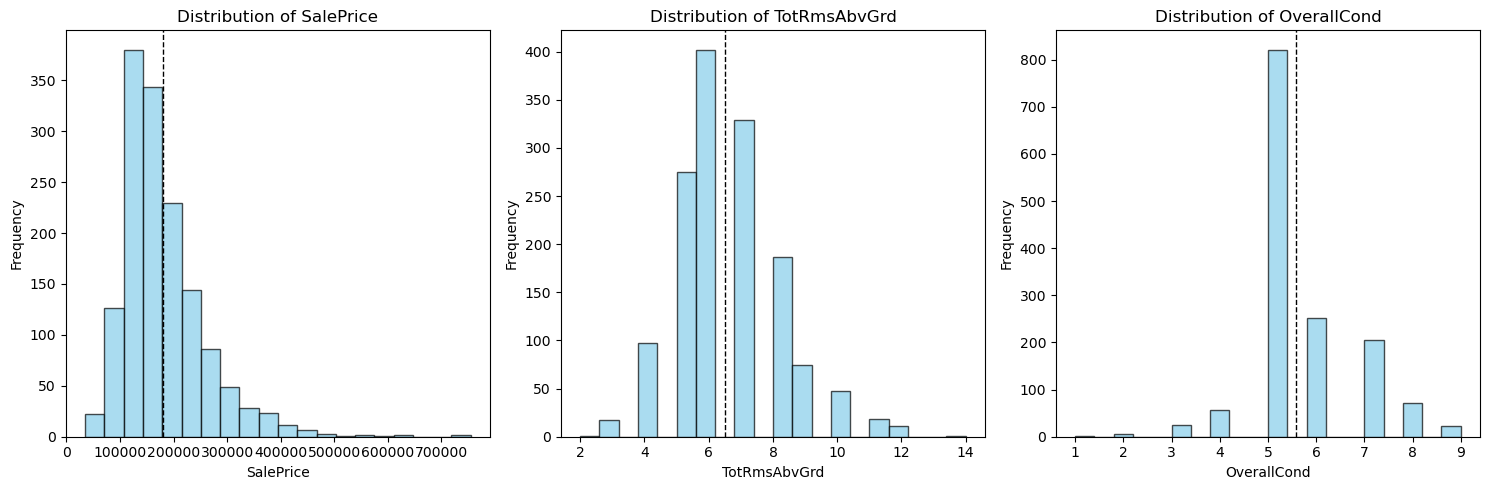

In [9]:
columns = ['SalePrice', 'TotRmsAbvGrd', 'OverallCond']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# Plot histograms for each column
for i, column in enumerate(columns):
    # Histogram plot
    ax = axes[i]
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Add vertical line for mean
    mean_value = df[column].mean()
    ax.axvline(mean_value, color='black', linestyle='--', linewidth=1)
    
    # Set titles and labels
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

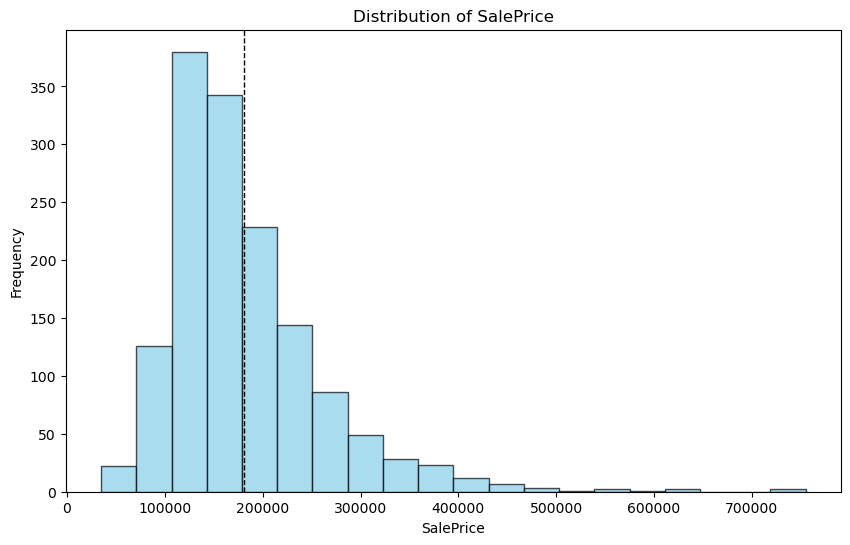

In [10]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)


plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

mean_sale_price = df['SalePrice'].mean()
plt.axvline(mean_sale_price, color='black', linestyle='--', linewidth=1)


plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

plt.show()

Now, print out the mean, median, and standard deviation:

In [11]:
# Your code here
# Calculate mean, median, and standard deviation
mean_sale_price = df['SalePrice'].mean()
median_sale_price = df['SalePrice'].median()
std_sale_price = df['SalePrice'].std()

# Print out the results
print(f"Mean SalePrice: {mean_sale_price}")
print(f"Median SalePrice: {median_sale_price}")
print(f"Standard Deviation of SalePrice: {std_sale_price}")


Mean SalePrice: 180921.19589041095
Median SalePrice: 163000.0
Standard Deviation of SalePrice: 79442.50288288663


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
Mean Sale Price: The average price of each property in the dataset is known as the mean sale price. The dataset's central tendency for sale prices is shown in this instance by the mean sale price.

Median Sale Price: When the dataset is ordered in ascending order, the median sale price indicates the dataset's middle value. In contrast to the mean, it is less susceptible to extreme values, or outliers. The mean and median of a symmetrically distributed dataset will be near to each other. The median might be a more accurate depiction of the average sale price in cases where the distribution is skewed.

Standard Deviation of SalePrice: The standard deviation measures the dispersion or spread of the sale prices around the mean. A higher standard deviation indicates that the sale prices are more spread out from the mean, while a lower standard deviation indicates that the sale prices are closer to the mean. It gives a sense of the variability or consistency of the sale prices in the dataset.

"""

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

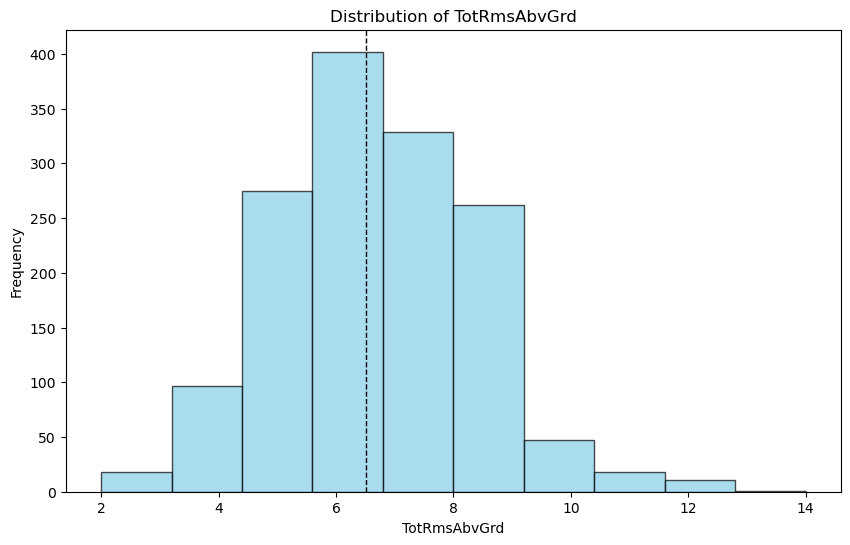

In [12]:
# Your code here
plt.figure(figsize=(10, 6))
plt.hist(df['TotRmsAbvGrd'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical line for mean
mean_tot_rooms = df['TotRmsAbvGrd'].mean()
plt.axvline(mean_tot_rooms, color='black', linestyle='--', linewidth=1)

# Set title and labels
plt.title('Distribution of TotRmsAbvGrd')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')

# Show plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [13]:
# Your code here
# Calculate mean, median, and standard deviation
mean_tot_rooms = df['TotRmsAbvGrd'].mean()
median_tot_rooms = df['TotRmsAbvGrd'].median()
std_tot_rooms = df['TotRmsAbvGrd'].std()

# Print out the results
print(f"Mean TotRmsAbvGrd: {mean_tot_rooms}")
print(f"Median TotRmsAbvGrd: {median_tot_rooms}")
print(f"Standard Deviation of TotRmsAbvGrd: {std_tot_rooms}")


Mean TotRmsAbvGrd: 6.517808219178082
Median TotRmsAbvGrd: 6.0
Standard Deviation of TotRmsAbvGrd: 1.625393290584064


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
Mean TotRmsAbvGrd: The mean total rooms above grade represents the average number of rooms (excluding bathrooms) in the houses in the dataset. In this case, the mean indicates the central tendency of the number of rooms above grade in the dataset.

Median TotRmsAbvGrd: The median total rooms above grade represents the middle value of the dataset when it is sorted in ascending order. Similar to the mean, it gives an indication of the typical number of rooms in the houses. However, it is less influenced by extreme values (outliers) in the dataset.

Standard Deviation of TotRmsAbvGrd: The standard deviation measures the spread or dispersion of the number of rooms above grade around the mean. A higher standard deviation indicates that the number of rooms varies more widely from the mean, while a lower standard deviation indicates that the number of rooms is closer to the mean. It provides a measure of the variability or consistency in the number of rooms above grade across the houses in the dataset.
"""

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

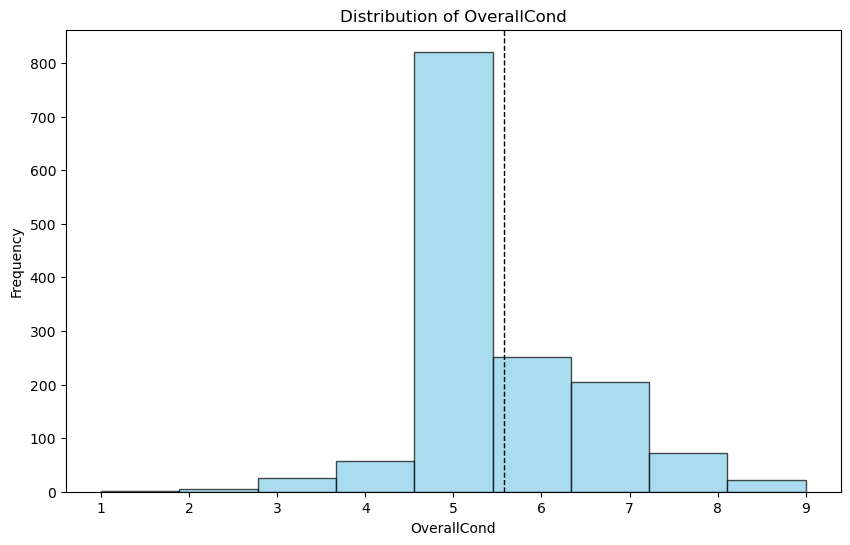

In [14]:
# Your code here
plt.figure(figsize=(10, 6))
plt.hist(df['OverallCond'], bins=9, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical line for mean
mean_overall_cond = df['OverallCond'].mean()
plt.axvline(mean_overall_cond, color='black', linestyle='--', linewidth=1)

# Set title and labels
plt.title('Distribution of OverallCond')
plt.xlabel('OverallCond')
plt.ylabel('Frequency')

# Show plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [15]:
# Your code here
# Calculate mean, median, and standard deviation
mean_overall_cond = df['OverallCond'].mean()
median_overall_cond = df['OverallCond'].median()
std_overall_cond = df['OverallCond'].std()

# Print out the results
print(f"Mean OverallCond: {mean_overall_cond}")
print(f"Median OverallCond: {median_overall_cond}")
print(f"Standard Deviation of OverallCond: {std_overall_cond}")


Mean OverallCond: 5.575342465753424
Median OverallCond: 5.0
Standard Deviation of OverallCond: 1.1127993367127367


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
Mean OverallCond: The mean overall condition represents the average condition rating of the houses in the dataset. In this case, the mean indicates the central tendency of the overall condition ratings in the dataset.

Median OverallCond: The median overall condition represents the middle value of the dataset when it is sorted in ascending order. Similar to the mean, it gives an indication of the typical overall condition rating of the houses. However, it is less influenced by extreme values (outliers) in the dataset.

Standard Deviation of OverallCond: The standard deviation measures the spread or dispersion of the overall condition ratings around the mean. A higher standard deviation indicates that the overall condition ratings vary more widely from the mean, while a lower standard deviation indicates that the ratings are closer to the mean. It provides a measure of the variability or consistency in the overall condition ratings across the houses in the dataset.
"""

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [18]:
# Replace None with appropriate code

below_average_condition = df[df['OverallCond'] < 5]

average_condition = df[df['OverallCond'] == 5]

above_average_condition = df[df['OverallCond'] > 5]


The following code checks that you created the subsets correctly:

In [19]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

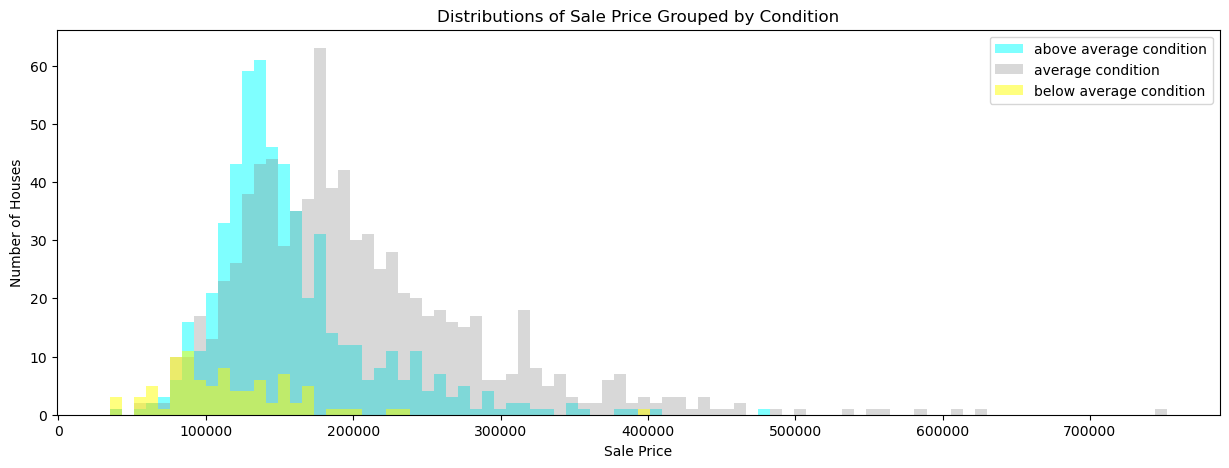

In [20]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text
"""
Overall, it appears that houses with an above average condition tend to have higher sale prices, followed by houses with an average condition, and then houses with a below average condition.
The distribution of sale prices for houses with an above average condition is skewed towards higher prices, indicating that houses in better condition generally command higher prices.
Similarly, the distribution of sale prices for houses with a below average condition is skewed towards lower prices, suggesting that houses in poorer condition tend to sell for less.
Houses with an average condition show a more balanced distribution of sale prices, with a moderate spread across different price ranges.
There is a considerable overlap between the distributions, especially between houses with an average condition and houses with a below average condition. This suggests that the overall condition alone may not be the sole determinant of sale price, as other factors may also influence the pricing.
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [24]:
# Your code here


numeric_columns = df.select_dtypes(include=['int64', 'float64'])


correlations = numeric_columns.corr()['SalePrice'].drop('SalePrice')

most_positively_correlated_column = correlations.idxmax()
highest_correlation = correlations.max()

print(f"Most positively correlated column (other than SalePrice): {most_positively_correlated_column}")
print(f"Pearson correlation coefficient: {highest_correlation}")



Most positively correlated column (other than SalePrice): OverallQual
Pearson correlation coefficient: 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [27]:
# Your code here

numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlations = numeric_columns.corr()['SalePrice'].drop('SalePrice')

most_negatively_correlated_column = correlations.idxmin()
lowest_correlation = correlations.min()

print(f"Most negatively correlated column: {most_negatively_correlated_column}")
print(f"Pearson correlation coefficient: {lowest_correlation}")



Most negatively correlated column: KitchenAbvGr
Pearson correlation coefficient: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

In [35]:
# Replace None with appropriate code

# Compute Pearson correlation coefficients between SalePrice and other numeric columns
correlations = numeric_columns.corr()['SalePrice'].drop('SalePrice')

# Print out column names along with their correlation coefficients
print("Column Name\t\tCorrelation")
for column, correlation in correlations.items():
    print(f"{column}\t\t{correlation}")

# Find the column with the highest correlation coefficient (most positive)
most_positively_correlated_column = correlations.idxmax()
highest_correlation = correlations.max()

# Find the column with the lowest correlation coefficient (most negative)
most_negatively_correlated_column = correlations.idxmin()
lowest_correlation = correlations.min()

# Print the names of the most positively and most negatively correlated columns
print(f"Most positively correlated column: {most_positively_correlated_column}")
print(f"Most negatively correlated column: {most_negatively_correlated_column}")





Column Name		Correlation
MSSubClass		-0.08428413512659509
LotFrontage		0.35179909657067737
LotArea		0.2638433538714051
OverallQual		0.7909816005838053
OverallCond		-0.07785589404867797
YearBuilt		0.5228973328794967
YearRemodAdd		0.5071009671113866
MasVnrArea		0.47749304709571444
BsmtFinSF1		0.3864198062421535
BsmtFinSF2		-0.011378121450215146
BsmtUnfSF		0.21447910554696928
TotalBsmtSF		0.6135805515591943
1stFlrSF		0.6058521846919153
2ndFlrSF		0.31933380283206736
LowQualFinSF		-0.02560613000067955
GrLivArea		0.7086244776126515
BsmtFullBath		0.22712223313149427
BsmtHalfBath		-0.01684415429735895
FullBath		0.5606637627484453
HalfBath		0.28410767559478256
BedroomAbvGr		0.16821315430073963
KitchenAbvGr		-0.13590737084214105
TotRmsAbvGrd		0.5337231555820284
Fireplaces		0.46692883675152763
GarageYrBlt		0.4863616774878596
GarageCars		0.6404091972583519
GarageArea		0.6234314389183622
WoodDeckSF		0.32441344456812926
OpenPorchSF		0.31585622711605504
EnclosedPorch		-0.1285779579259566
3SsnPorch		0

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
Overall Quality (OverallQual):

Houses with higher overall quality ratings are expected to have higher sale prices. Buyers are typically willing to pay more for houses with better quality materials and finishes.
The box plot should show higher median sale prices for houses with higher overall quality ratings.
Above Ground Living Area (GrLivArea):

Larger living areas are generally associated with higher sale prices. Buyers often prioritize spaciousness when looking for a home.
The box plot should show a positive correlation between the size of the living area and the sale price.
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [36]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

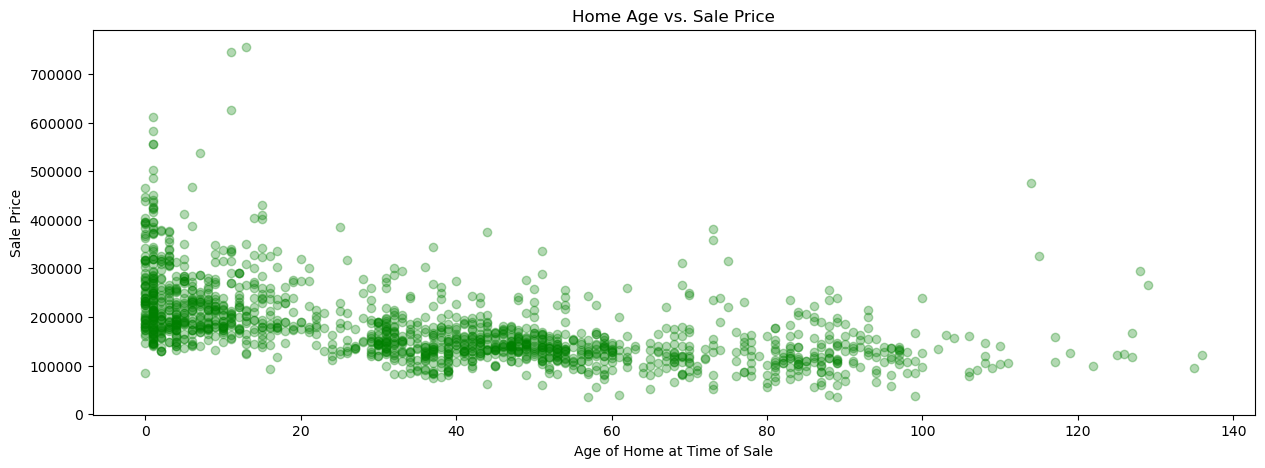

In [37]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
None
As the age of the home increases, there seems to be a trend of decreasing sale prices. This suggests that older homes tend to sell for lower prices compared to newer homes.
The scatter plot reveals a somewhat linear pattern, indicating that there is a negative correlation between the age of the home and its sale price. In other words, newer homes tend to command higher sale prices.
However, it's important to note that while there is a general trend of decreasing sale prices with increasing age, there is also considerable variability in sale prices for homes of the same age. This variability could be influenced by other factors such as location, size, condition, and specific features of the homes.
The alpha value of 0.3 is used for transparency, allowing us to see the density of points in areas with overlapping data points.
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.